### clustering 3 synthetic clusters with hdbscan

In [1]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
figsize = (12, 8)

#### data

In [3]:
n_samples = 750
centers = [[1, 1], [-1, -1], [1, -1]]
random_state = 0
X, labels_true = make_blobs(n_samples=n_samples, centers=centers,
                            cluster_std=0.4, random_state=random_state)

In [4]:
df = pd.DataFrame(X)
df.head()

,0,1
0,0.840220,1.148022
1,-1.154748,-1.204117
2,0.678636,0.724180
3,0.450783,-1.427097
4,1.492116,1.480952


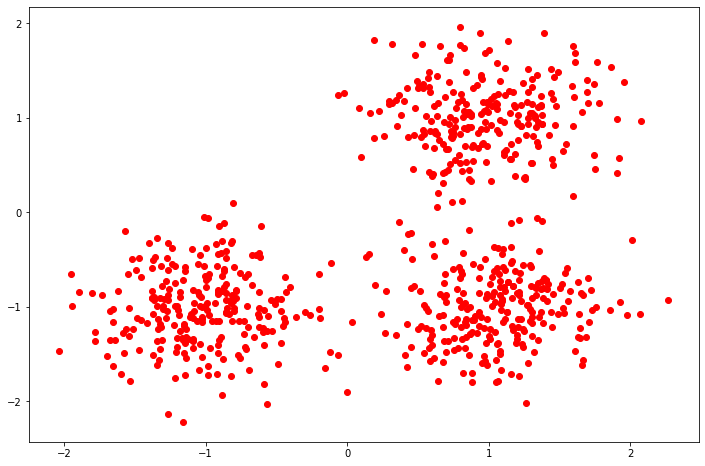

In [5]:
plt.figure(figsize=figsize)
plt.scatter(X[:, 0], X[:, 1], color='r')

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

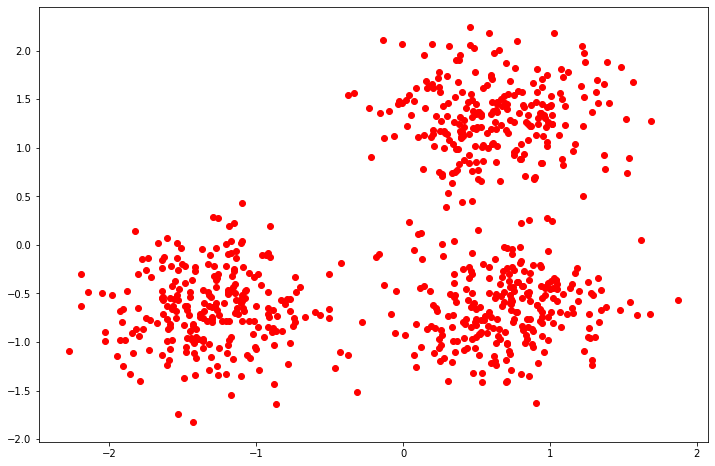

In [7]:
plt.figure(figsize=figsize)
plt.scatter(X[:, 0], X[:, 1], color='r')

### clustering

In [8]:
hdb = hdbscan.HDBSCAN()
hdb.fit(X)

HDBSCAN()

In [9]:
labels = hdb.labels_
labels[:10]

array([2, 0, 2, 1, 2, 0, 0, 1, 2, 2])

In [10]:
labels.max()

2

In [11]:
hdb.__dict__

{'min_cluster_size': 5,
 'min_samples': None,
 'alpha': 1.0,
 'cluster_selection_epsilon': 0.0,
 'metric': 'euclidean',
 'p': None,
 'algorithm': 'best',
 'leaf_size': 40,
 'memory': Memory(location=None),
 'approx_min_span_tree': True,
 'gen_min_span_tree': False,
 'core_dist_n_jobs': 4,
 'cluster_selection_method': 'eom',
 'allow_single_cluster': False,
 'match_reference_implementation': False,
 'prediction_data': False,
 '_metric_kwargs': {},
 '_condensed_tree': array([(750, 273,  1.70056338,   1), (750, 461,  1.8309047 ,   1),
        (750,  16,  1.93708237,   1), (750,  76,  1.98215167,   1),
        (750, 663,  2.02280766,   1), (750, 149,  2.332645  ,   1),
        (750, 135,  2.34809365,   1), (750, 657,  2.39704102,   1),
        (750, 110,  2.41404619,   1), (750, 454,  2.49647974,   1),
        (750, 165,  2.53156984,   1), (750, 531,  2.55043552,   1),
        (750, 684,  2.56304718,   1), (750, 108,  2.56587745,   1),
        (750, 158,  2.60163786,   1), (750, 337,  2.673

In [12]:
# number of clusters, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"estimated number of clusters: {n_clusters}")

estimated number of clusters: 3


In [13]:
print(f"homogeneity: {metrics.homogeneity_score(labels_true, labels)}")

homogeneity: 0.9307009797205946


In [14]:
print(f"v-measure: {metrics.v_measure_score(labels_true, labels)}")

v-measure: 0.8820588008949019


In [15]:
print(f"adjusted Rand index {metrics.adjusted_rand_score(labels_true, labels)}")

adjusted Rand index 0.9253185528902855


In [16]:
print(f"adjusted mutual information: {metrics.adjusted_mutual_info_score(labels_true, labels)}")

adjusted mutual information: 0.8816459693669669


In [17]:
print(f"silhouette coefficient: {metrics.silhouette_score(X, labels)}")

silhouette coefficient: 0.6127110856466694


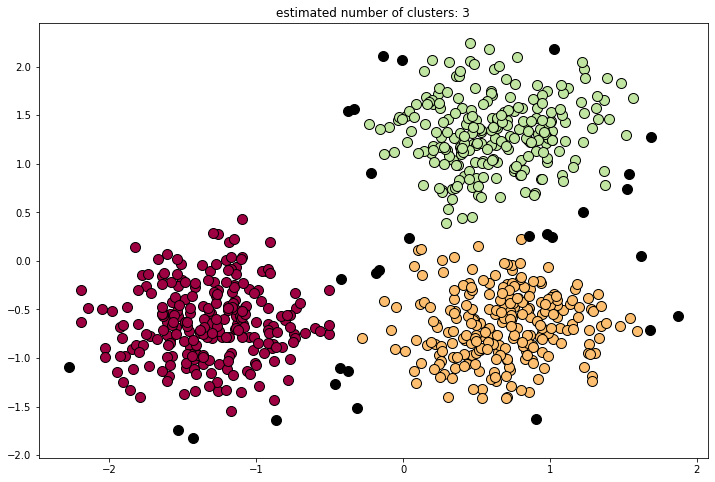

In [18]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=figsize)

for k, color in zip(unique_labels, colors):
    if k == -1:
        color = 'k'
    cluster_member_mask = (labels == k)
    xy = X[cluster_member_mask]
    plt.plot(xy[: , 0], xy[:, 1], 'o', markerfacecolor=color, markeredgecolor='k', markersize=10)
plt.title(f"estimated number of clusters: {n_clusters}")
plt.show()